In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [3]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/MAXI J1820+070.txt")

MAXI J1820+070
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [4]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,MAXI J1820+070,68,[Bright et al. 2020 & https://ui.adsabs.harvar...,[Bright et al. 2020 & https://ui.adsabs.harvar...,NaN,NaN


In [5]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,MAXI J1820+070,1538156623,L,58389.745880,0.010273,NaN,IMS,3.47,0.180124,NaN,NaN,NaN,False
1,MAXI J1820+070,1538757039,L,58396.695119,0.010088,NaN,HS,11.80,0.602890,NaN,NaN,NaN,False
2,MAXI J1820+070,1539354654,L,58403.662277,0.010088,NaN,HS,2.62,0.136152,NaN,NaN,NaN,False
3,MAXI J1820+070,1539529257,L,58405.671707,0.071266,NaN,HS,2.42,0.124108,NaN,NaN,NaN,False
4,MAXI J1820+070,1539955889,L,58410.619211,0.010273,NaN,HS,1.52,0.095060,NaN,NaN,NaN,False


In [6]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,MAXI J1820+070,00813771000wt,58189.08144,0.118333,NaN,HS,1.910800e-09,1.913462e-10,1.913447e-10,tbabs(pow),NaN,False
1,MAXI J1820+070,00813771000pc,58189.12179,0.095000,NaN,HS,1.515900e-09,1.523147e-10,1.523077e-10,tbabs(pow),NaN,False
2,MAXI J1820+070,00010627002wt,58190.74007,0.011574,NaN,HS,4.188200e-09,4.191663e-10,4.191649e-10,tbabs(pow),NaN,False
3,MAXI J1820+070,00814259000wt,58191.83686,0.070579,NaN,HS,6.099500e-09,6.101289e-10,6.101285e-10,tbabs(pow),NaN,False


# Light Curves

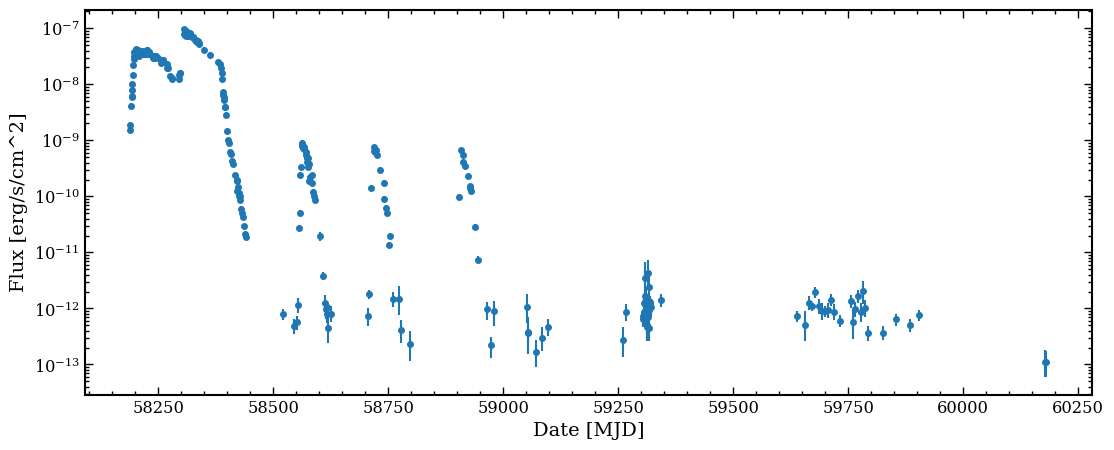

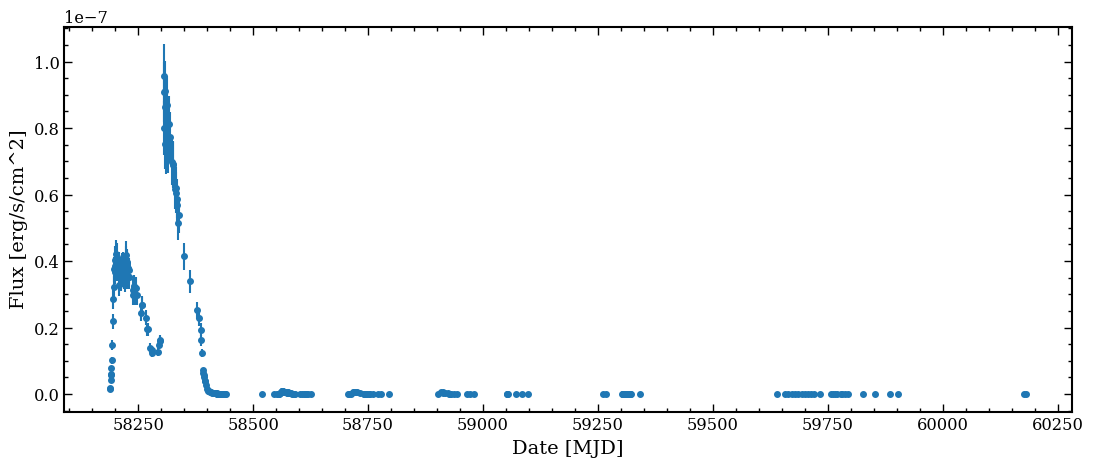

In [7]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

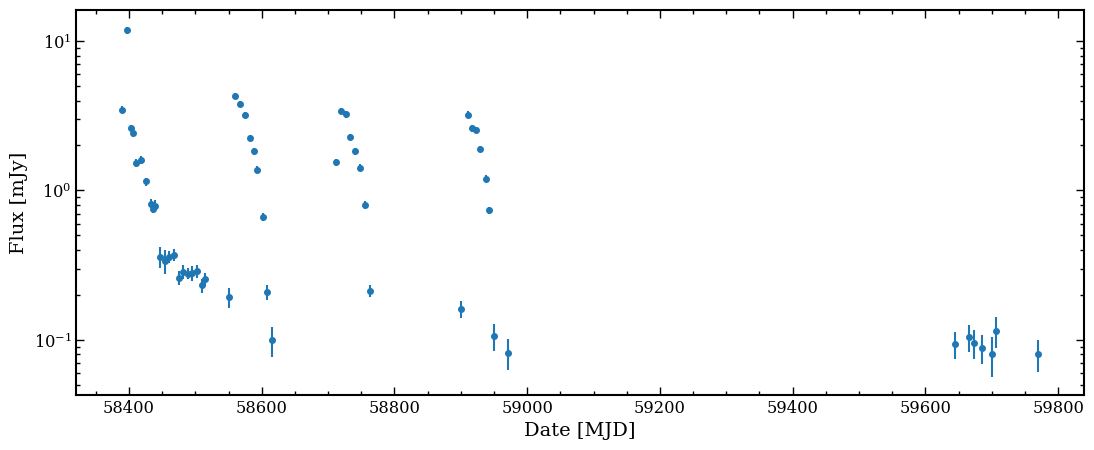

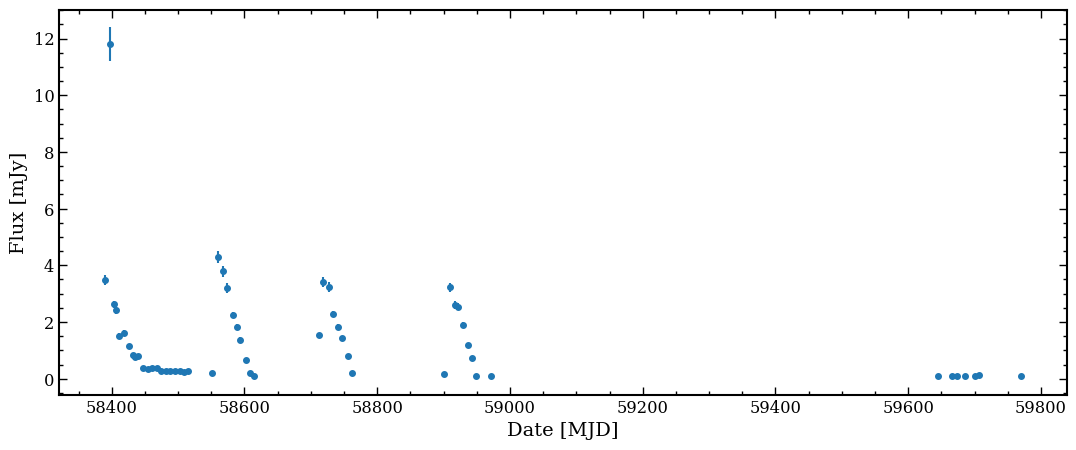

In [8]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [9]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58389.745880000     3.47000             0.18012             2         8.54484e-09                   6.25071e-10                   6.25070e-10                   False          False          IMS            
58396.695119065     11.80000            0.60289             1         2.86970e-09                   2.87156e-10                   2.87155e-10                   False          False          HS             
58403.662276900     2.62000             0.13615             1         8.91560e-10                   8.95174e-11                   8.95142e-11                   False          False          HS             
58410.619211190     1.52000             0.09506             1         4.22570e-10                   4.24281e-11                   4.24266e-11                   False          F

In [10]:
lr_all, lx_all, all_types = get_bahramian_data()

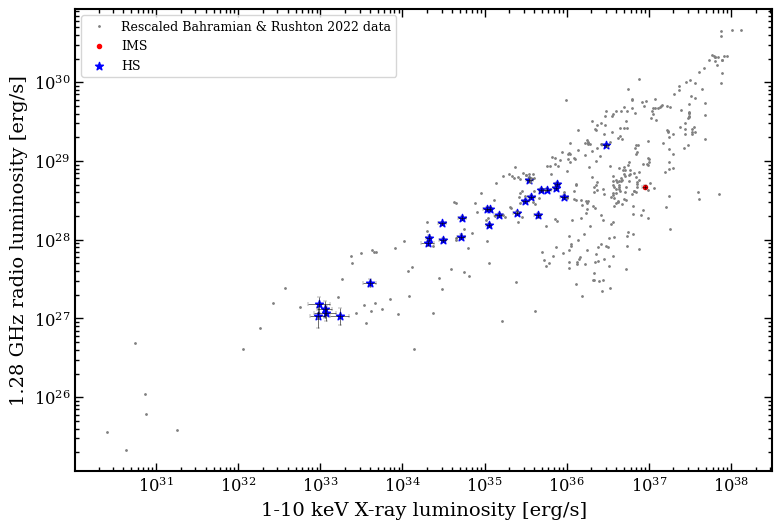

In [11]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  3982
58389.74588: time_to_nearest: 0.578880000000936 & time_to_furthest: 0.7862300000051619; y_predict_err: 0.037176933697953274
58396.695119065: time_to_nearest: 0.4050709349976387 & time_to_furthest: 1.2629190649968223; y_predict_err: 0.04175367463781399
58403.66227690014: time_to_nearest: 0.6053830998571357 & time_to_furthest: 1.3803369001398096; y_predict_err: 0.03733435812701913
58405.67170743807: time_to_nearest: 1.0658125619302155 & time_to_furthest: 1.4040474380744854; y_predict_err: 0.035935419701020876
58410.61921118968: time_to_nearest: 0.3076411896836362 & time_to_furthest: 1.4477088103158167; y_predict_err: 0.04197307804711592
58418.53941717185: time_to_nearest: 0.9222671718525817 & time_to_furthest: 1.438462828147749; y_predict_err: 0.03535254984398151
58425.50139: time_to_nearest: 0.09029000000009546 & time_to_furthest: 0.7791799999977229; y_predict_err: 0.04516911592857653
58432.48179: time_to_nearest: 0.07039000000077067

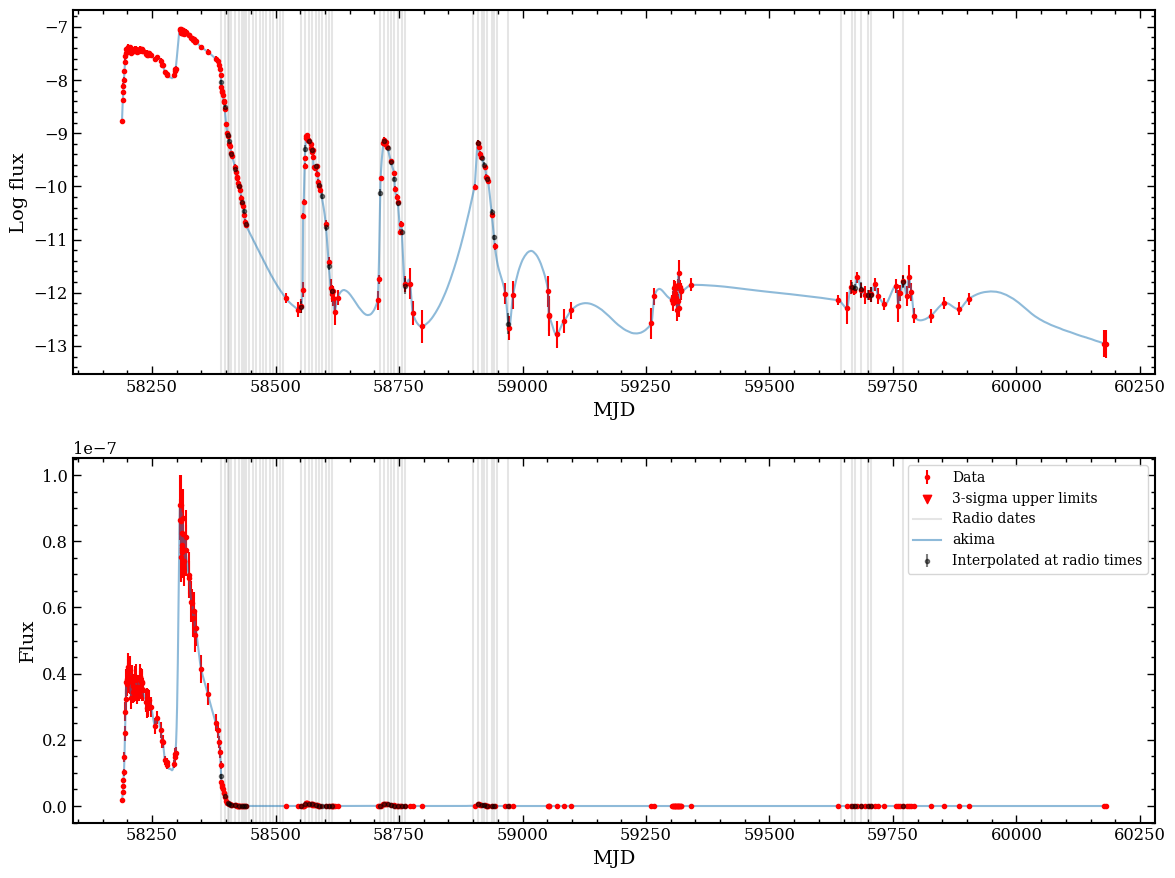

Number of used interpolated data points:  41
Converting to luminosity using d_kpc = 2.96


In [12]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

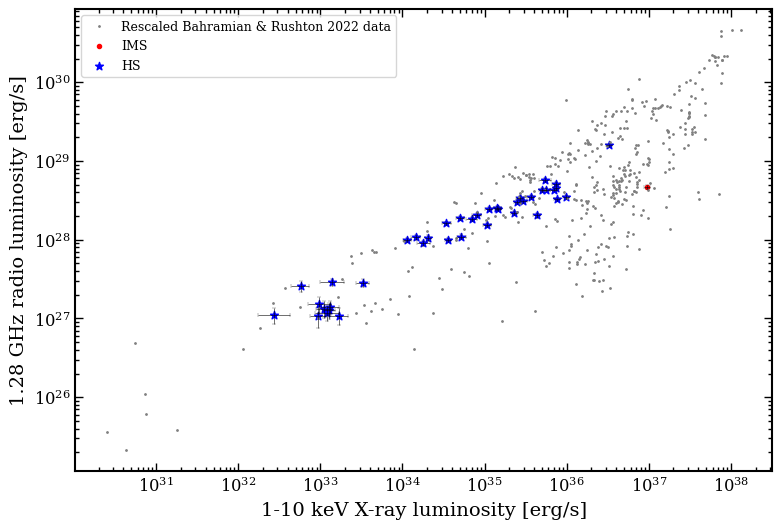

In [13]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)